# Simulating logic gates using `crysx_nn`

## Run the following for Google colab 
then restart runtime

In [ ]:
! pip install --upgrade --no-cache-dir https://github.com/manassharma07/crysx_nn/tarball/main
! pip install IPython==7.7.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define some network parameters that we will be using to initialize the model

In [2]:
nInputs = 2 # No. of nodes in the input layer
neurons_per_layer = [3, 1] # Neurons per layer (excluding the input layer)
activation_func_names = ['Tanh_offset', 'Tanh_offset']
nLayers = len(neurons_per_layer)
nEpochs=10**4
batchSize = 4 # No. of input samples to process at a time for optimization

## Create the neural network model

In [3]:
from crysx_nn import network
model = network.nn_model(nInputs=nInputs, neurons_per_layer=neurons_per_layer, activation_func_names=activation_func_names, batch_size=batchSize, device='CPU', init_method='Xavier') 

C:\Users\manas\anaconda3\envs\crysx_nn\lib\site-packages\crysx_nn\network.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Note: The model will use the following device for all the computations:  CPU


## Check the details of the model for confirmation

In [4]:
model.details()

----------------------------------------------------------------------------------
****Neural Network Model Details****
----------------------------------------------------------------------------------
Number of input nodes:  2
Number of layers (hidden+output):  2
Number of nodes in each layer (hidden & output):  [3, 1]
Activation function for each layer (hidden & output):   ['Tanh_offset', 'Tanh_offset']
Method used for weights and biases initialization:   Xavier
Batch Size:  4
Device:  CPU
Optimization method:  SGD
Learning rate:  0.5
----------------------------------------------------------------------------------


## Visualize the network

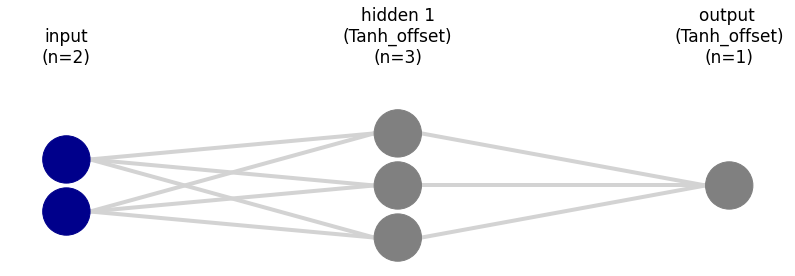

In [5]:
model.visualize()

## Initial Weights and Biases being used by the network

In [6]:
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.27237922, -0.47105235],
       [-0.33306262, -0.00656199],
       [ 0.4687743 , -0.22776012]], dtype=float32), array([[-0.5431261 ,  0.30474243, -0.17763016]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


## Set the inputs (rows correspond to different set of inputs and columns represent the inputs)

In [7]:
inputs = np.array([[0.,0.,1.,1.],[0.,1.,0.,1.]]).T.astype(np.float32)
print(inputs)
print(inputs.dtype)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
float32


## Outputs for different logic gates

In [8]:
# AND function
outputAND = np.array([0.,0.,0.,1.])
outputAND = np.asarray([outputAND]).T.astype(np.float32)
# OR function
outputOR = np.array([0.,1.,1.,1.])
outputOR = np.asarray([outputOR]).T.astype(np.float32)
# NAND function
outputNAND = np.array([1.,1.,1.,0.])
outputNAND = np.asarray([outputNAND]).T.astype(np.float32)
# XOR function
outputXOR = np.array([0.,1.,1.,0.])
outputXOR = np.asarray([outputXOR]).T.astype(np.float32)

In [9]:
print('AND outputs\n', outputAND)
print('OR outputs\n', outputOR)
print('XOR outputs\n', outputXOR)
print('NAND outputs\n', outputNAND)

AND outputs
 [[0.]
 [0.]
 [0.]
 [1.]]
OR outputs
 [[0.]
 [1.]
 [1.]
 [1.]]
XOR outputs
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND outputs
 [[1.]
 [1.]
 [1.]
 [0.]]


## You can also reinitialize weights and biases using some other method

In [10]:
model.init_params(method='NormXavier')
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 1.1307003 , -1.3087877 ],
       [ 1.3844239 ,  0.30616888],
       [-1.4107655 , -1.575145  ]], dtype=float32), array([[-1.3044468,  1.9078242, -0.4753022]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


## You can also define your own custom initial guess and weights

For example, for a neural network with 2 nodes in input layer, 3 nodes in hidden layer and 1 node in output layer use the following commented code

In [11]:
# # Initial guesses for weights
# w1 = 0.30
# w2 = 0.55
# w3 = 0.20
# w4 = 0.45
# w5 = 0.50
# w6 = 0.35
# w7 = 0.15
# w8 = 0.40
# w9 = 0.25

# # Initial guesses for biases
# b1 = 0.60
# b2 = 0.05

# # need to use a list instead of a numpy array, since the 
# #weight matrices at each layer are not of the same dimensions
# weights = [] 
# # Weights for layer 1 --> 2
# weights.append(np.array([[w1,w4],[w2, w5], [w3, w6]]))
# # Weights for layer 2 --> 3
# weights.append(np.array([[w7, w8, w9]]))
# # List of biases at each layer
# biases = []
# biases.append(np.array([b1,b1,b1]))
# biases.append(np.array([b2]))

# weightsOriginal = weights
# biasesOriginal = biases

# print('Weights matrices: ',weights)
# print('Biases: ',biases)

## Train neural network for AND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [12]:

# Run optimization
model.optimize(inputs, outputAND, lr=0.5,nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.42271436017472297


### Visualize the training loss

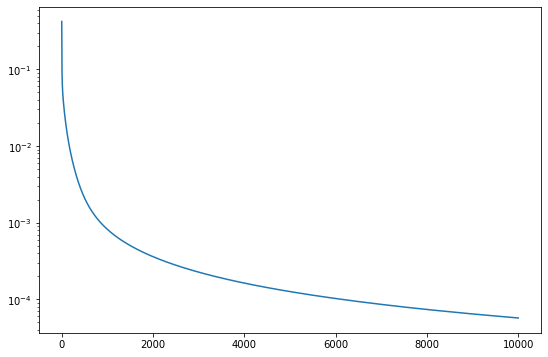

In [13]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [14]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[ 0.89689505, -2.9354546 ],
       [ 2.5178607 ,  0.5506712 ],
       [-1.2489262 , -1.1598884 ]], dtype=float32), array([[-3.6232061,  4.2423882, -2.1073623]], dtype=float32)]
Optimized Biases:  [array([ 0.27787414, -1.7763829 ,  1.6027387 ], dtype=float32), array([-1.2320949], dtype=float32)]


### Make predictions using the optimized weights

In [15]:
predictions, error = model.predict(inputs, outputAND, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputAND)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[1.8775463e-05]
 [8.0776811e-03]
 [6.7763627e-03]
 [9.8918998e-01]]
Expected Output:
 [[0.]
 [0.]
 [0.]
 [1.]]
New Average Error with optimized weights:
 5.700621377346948e-05


## Train neural network for NAND gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [16]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.09434097,  0.1255047 ],
       [-0.45253515, -0.12792434],
       [-0.7043653 ,  0.49907452]], dtype=float32), array([[ 0.37827623, -0.44098824, -0.22726107]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


In [17]:

# Run optimization
model.optimize(inputs, outputNAND, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.2886341065168381


### Visualize the training loss

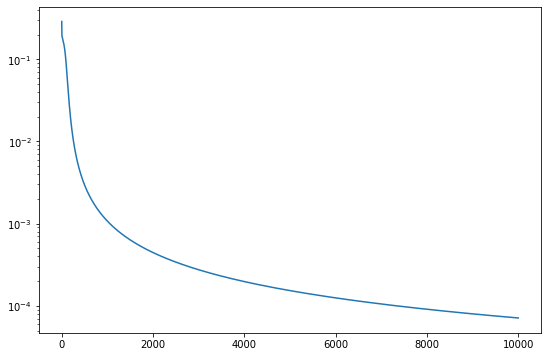

In [18]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [19]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[-2.1502495 , -2.3998432 ],
       [-0.93700963, -0.6141791 ],
       [-1.1899068 ,  0.18910651]], dtype=float32), array([[5.2585807, 1.2161161, 0.5291759]], dtype=float32)]
Optimized Biases:  [array([ 3.1702328 ,  0.5182878 , -0.13184388], dtype=float32), array([-2.662787], dtype=float32)]


### Make predictions using the optimized weights

In [20]:
predictions, error = model.predict(inputs, outputNAND, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputNAND)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.99940616]
 [0.9932767 ]
 [0.9917262 ]
 [0.01304379]]
Expected Output:
 [[1.]
 [1.]
 [1.]
 [0.]]
New Average Error with optimized weights:
 7.103778164463392e-05


## Train neural network for OR gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [21]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.00294765,  0.23568808],
       [ 0.319018  ,  0.40998763],
       [-0.70081043,  0.6482815 ]], dtype=float32), array([[0.4906308 , 0.24523868, 0.11702461]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


In [22]:

# Run optimization
model.optimize(inputs, outputOR, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.1753894854336977


### Visualize the training loss

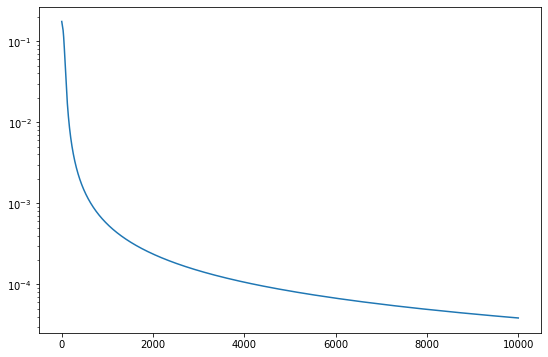

In [23]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [24]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[ 1.6997052 ,  2.0885415 ],
       [ 1.8297576 ,  2.1777308 ],
       [-1.1654942 ,  0.03359264]], dtype=float32), array([[ 2.9748297,  3.1724503, -1.3979311]], dtype=float32)]
Optimized Biases:  [array([-1.0042561 , -1.0544163 ,  0.68680996], dtype=float32), array([-1.9070308], dtype=float32)]


### Make predictions using the optimized weights

In [25]:
predictions, error = model.predict(inputs, outputOR, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputOR)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.0094302 ]
 [0.9933238 ]
 [0.9955442 ]
 [0.99951303]]
Expected Output:
 [[0.]
 [1.]
 [1.]
 [1.]]
New Average Error with optimized weights:
 3.8397902674347506e-05


## Train neural network for XOR gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [26]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.46584165, -0.268446  ],
       [-0.22968236,  0.46876493],
       [-0.19580884,  0.5032269 ]], dtype=float32), array([[ 0.4669477 ,  0.09741905, -0.00350301]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


In [27]:

# Run optimization
model.optimize(inputs, outputXOR, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.27354753762483597


### Visualize the training loss

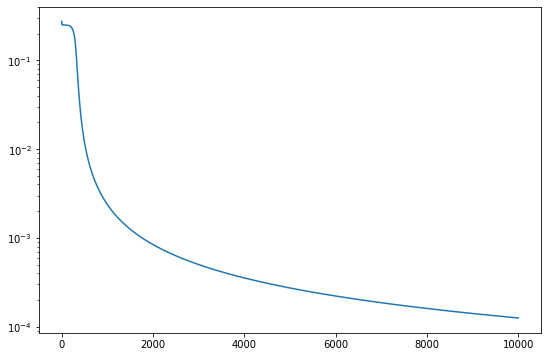

In [28]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [29]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[ 3.1137862 , -3.1390915 ],
       [-3.0763521 ,  3.0326092 ],
       [-0.33211198,  0.6066348 ]], dtype=float32), array([[ 4.9735923,  5.206249 , -0.6460664]], dtype=float32)]
Optimized Biases:  [array([-1.7277296 , -1.65821   ,  0.34298766], dtype=float32), array([-2.0870354], dtype=float32)]


### Make predictions using the optimized weights

In [30]:
predictions, error = model.predict(inputs, outputXOR, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputXOR)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.01256225]
 [0.9888902 ]
 [0.9893915 ]
 [0.01045451]]
Expected Output:
 [[0.]
 [1.]
 [1.]
 [0.]]
New Average Error with optimized weights:
 0.00012576878725667484
